### Поиск взаимосвязей с помощью корреляции
Анализировать мы будем довольно интересный набор данных **Foodmart product sales.** В этом наборе данных для каждого продукта известно количество покупок этого продукта в некоторую дату, в определенном магазине. Мы с вами будем искать связи вида:
- Правда ли, что покупки этого товара влияют на покупку второго товара?
- Правда ли, что покупки товара A приводят к увеличению или уменьшению покупок товара B?

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных
Файлов несколько, поэтому каждому файлу дадим свое имя

In [6]:
# Продукты
products = pd.read_csv('foodmart_products.csv', sep='\t')
products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [14]:
# Продажи
sales = pd.read_csv('foodmart_sales.csv', sep='\t', parse_dates=[2])
sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


Нам необходимо определить сколько товаров, их наименование и когда продавались. Для этого вытащим необходимую нам инфорацию

In [17]:
product_sales = sales.merge(products[['product_id', 'product_name']], on='product_id', how='inner')
product_sales.head()

,product_id,store_id,date,sales,product_name
0,4,6,1997-01-01,4,Washington Cream Soda
1,4,7,1997-01-05,3,Washington Cream Soda
2,4,6,1997-01-06,2,Washington Cream Soda
3,4,17,1997-01-11,2,Washington Cream Soda
4,4,24,1997-01-11,2,Washington Cream Soda


### Взаимное влияние продуктов друг на друга
Таблица ```product_sales``` содержит продажи продуктов, мы можем выяснить как продажи одного влияют на продажи другого (так называемое сочетание товаров). Для этого посчтитаем корреляцию Пирсона между парами продуктов.

Однако в таком виде, в каком она сейчас существует, это делать не очень удобно. Дело в том, что в этой таблице у нас есть информация только о покупках товара, и нет информации об отсутствии покупок некоторого товара, т.е. в некоторую дату в некотором магазине **продукт A**, скажем, не покупали, то у нас нет соответствующей строчки со значением **sales = 0.**

Получим эти строчки и вообще в целом немножечко изменим внешний вид таблицы. Будем работать с таблицей, у которой индексом является дата и магазин, а в столбцах расположена информация о покупках продуктов. То есть каждый столбец соответствует своему продукту. Тогда в каждой строчке мы получим значение покупок этого продукта за соответствующую дату в соответствующем магазине. Таким образом, мы сможем добавить туда эти самые нулевые значения, которых нам не хватало, и сможем рассчитать корреляцию между всеми парами столбцов.

In [24]:
product_sales_all = pd.pivot_table(product_sales,
                                   values='sales', 
                                   index=['date', 'store_id'],
                                   columns=['product_name'],
                                   aggfunc=lambda x: x,
                                   fill_value=0)

product_sales_all.head()

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                           0               0   
           14                          0               0   
1997-01-02 11                          0               0   
           23                          0               0   
1997-01-03 7                           0               0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                  0                      0   
           14                                 0                      0   
1997-01-02 11                                 0                      0   
           23                                 0                      0   
1997-01-03 7                                  0                      0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                                 0                   0   
           14                                0                   0   
1997-01-02 11                                0                   0   
           23                                0                   0   
1997-01-03 7                                 0                   0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                            0                            0   
           14                           0                            0   
1997-01-02 11                           0                            0   
           23                           0                            0   
1997-01-03 7                            0                            0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                                0                           0   
           14                               0                           0   
1997-01-02 11                               0                           0   
           23                               0                           0   
1997-01-03 7                                0                           0   

product_name         ...  Washington Apple Juice  Washington Berry Juice  \
date       store_id  ...                                                   
1997-01-01 6         ...                       0                       0   
           14        ...                       0                       0   
1997-01-02 11        ...                       0                       0   
           23        ...                       0                       0   
1997-01-03 7         ...                       0                       4   

product_name         Washington Cola  Washington Cranberry Juice  \
date       store_id                                                
1997-01-01 6                       0                           0   
           14                      0                           0   
1997-01-02 11                      0                           0   
           23                      0                           0   
1997-01-03 7                       0                           0   

product_name         Washington Cream Soda  Washington Diet Cola  \
date       store_id                                                
1997-01-01 6                             4                     0   
           14                            0                     0   
1997-01-02 11                            0                     0   
           23                            0                     0   
1997-01-03 7                             0                     0   

product_name         Wa

In [28]:
# Расчитываем корреляции 
product_sales_all_corr = product_sales_all.corr()
product_sales_all_corr.head()

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498


По этой таблице для каждого продукта мы можем посмотреть, как его покупки коррелируют с покупками других продуктов и найти наиболее сильные корреляции. Причем, как в положительную, так и в отрицательную сторону.

In [31]:
# Зафиксируем некий продукт и посмотрим его наибольшие корреляции
selected_product = 'American Chicken Hot Dogs'
product_sales_all_corr[[selected_product]].sort_values(selected_product, ascending=False)[1:].head()

product_name,American Chicken Hot Dogs
product_name,
Mighty Good Monthly Home Magazine,0.240269
Big Time Frozen Chicken Wings,0.223398
Carlson Sour Cream,0.220726
Great Cranberry Muffins,0.217509
Bravo Canned Tomatos,0.205075


In [32]:
# Наименьшие корреляции
product_sales_all_corr[[selected_product]].sort_values(selected_product, ascending=True)[1:].head()

product_name,American Chicken Hot Dogs
product_name,
Fast Low Fat Chips,-0.061037
PigTail Frozen Sausage Pizza,-0.058960
Plato Decaf Coffee,-0.058481
Kiwi Lox,-0.057037
Jeffers Wheat Puffs,-0.055207


Нельзя сказать, что они сильно влияют, потому что все эти значения очень близки к нулю. Поэтому тут сложно сделать выводы. Посмотрим, в принципе, максимальное по модулю отрицательное значение корреляции, чтобы понять, есть ли они в наших данных. Возможно, все отрицательные значения близки к 0.

In [36]:
product_sales_all_corr.min().sort_values()

product_name
Carlson Whole Milk             -0.085064
Pearl Chardonnay Wine          -0.085064
Gulf Coast Malted Milk Balls   -0.082598
Sunset Economy Toilet Brush    -0.082598
Fast Fudge Brownies            -0.082317
                                  ...   
Tri-State Onions               -0.056186
Imagine Fajita French Fries    -0.055764
High Top Honey Dew             -0.055239
Washington Berry Juice         -0.054562
CDR Apple Preserves            -0.048071
Length: 1559, dtype: float64

Такие корреляции близки к нулю и скорее всего незначимо от него отличаются

In [43]:
product_sales_all_corr[product_sales_all_corr != 1].max().sort_values(ascending=False)

product_name
Just Right Vegetable Soup        0.340598
Plato French Roast Coffee        0.340598
Nationeel Grape Fruit Roll       0.322176
Great Muffins                    0.322176
Skinner Strawberry Drink         0.306701
                                   ...   
Even Better Strawberry Yogurt    0.152606
Imagine Waffles                  0.150961
Imagine Grape Popsicles          0.150709
Best Oatmeal                     0.147462
Better Canned Yams               0.139904
Length: 1559, dtype: float64

Для положителных значений корреляции ситуация лучше, есть "большие" значения корреляции по которым мы можем предположить как покупки одного товара коррелируют с покупками другого товара и попытаться сделать соответствующие выводы.

**Задания из теста**

**1)** Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

In [74]:
with open('illiteracy.txt', 'r') as file:
    data = file.readlines()
    
columns = [value.strip() for value in data[0].split('\t')]
lines = []

for indx in range(len(data)):
    current_line = [value.strip() for value in data[indx].split('\t')]
    lines.append(current_line)
    
df = pd.DataFrame(lines[1:], columns=columns)
df[df.columns[1:]] = df[df.columns[1:]].astype('float')

Взглянем на диаграмму рассеяния

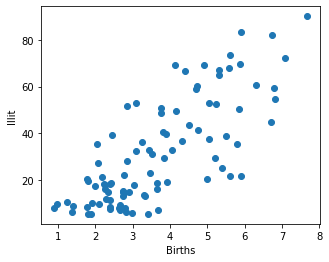

In [81]:
plt.figure(figsize=(5,4))
plt.scatter(df['Births'], df['Illit'])
plt.xlabel('Births')
plt.ylabel('Illit');

Явно иметеся линейная корреляция

In [85]:
print('Pearson Correlation: %.4f' %df['Births'].corr(df['Illit']))

Pearson Correlation: 0.7687


In [95]:
print('Spearman Correlation: %.4f' %df['Births'].corr(df['Illit'], method='spearman'))

Spearman Correlation: 0.7530


**2)** С помощью каких из методов по данным социологического опроса можно оценить силу взаимосвязи между возрастом (в годах) и средним годовым доходом (в рублях)?
- Коэффициент корреляции Пирсона (Так мы измерим силу линейной взаимосвязи между нашими непрерывными признаками)
- Коэффициент корреляции Спирмена (Так мы измерим силу монотонной взаимосвязи между нашими непрерывными признаками)

**3)** С помощью каких из этих величин по данным социологического опроса можно оценить силу взаимосвязи между полом и семейным положением (холост/в браке/в разводе)?
- Коэффициент V Крамера

**4)** С помощью каких из этих величин по данным социологического опроса можно оценить силу взаимосвязи между средним годовым доходом (в рублях) и наличием водительских прав (есть/нет)?
- Разность между средними доходами водителей и не-водителей